# IMPORT NECCESSARY LIBRARIES

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic("matplotlib", "inline")
sns.set(style = 'white')

import tqdm

In [4]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, learning_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# DATA PROCESSING

## IMPORTING THE DATA FILE

In [6]:

combdata = pd.read_csv("clean_data\\clean_data_1.csv")


## SPLITTING THE TRAIN AND TEST DATA

In [8]:
#selecting/splitting the test and train data 
train = combdata.loc[combdata['source']=="train"]
test = combdata.loc[combdata['source']=="test"]

# Dropping the source column
train.drop(columns = ['source'], inplace = True)
test.drop(labels = ['source', 'label'], axis = 1, inplace = True)
print(f' train shape, {train.shape} \n test shape {test.shape}')

train shape, (32561, 46) 
 test shape (16281, 45)


### SPLITTING THE LABELS AND THE FEATURES

In [10]:
#splitting the labels and the features

x_train = train.drop(columns = ['label'])
y_train = train['label'].astype(int)
print(f' Shape of train features {x_train.shape} and train label {y_train.shape}')

Shape of train features (32561, 45) and train label (32561,)


# DIFFERENT MODELS TO BE IMPLEMENTED 


1. K Nearest Neighbour
2. Linear Discriminant Analysis
3. Support Vector Classifier
4. Multi-layer Perceptron classifier
5. Extra Trees Classifier
6. Logistic Regression
7. Decision Trees
8. Random Forest
9. Gradient Boosting Classifier
10. AdaBoost Classifier

## TRAINING THE MODEL

In [12]:
random_state = 3

#creating a list to store the classifiers 
classifiers = []

classifiers.append(KNeighborsClassifier())
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(SVC(random_state = random_state))
classifiers.append(MLPClassifier(random_state = random_state))
classifiers.append(ExtraTreesClassifier(random_state = random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(DecisionTreeClassifier(random_state = random_state))
classifiers.append(RandomForestClassifier(random_state = random_state))
classifiers.append(GradientBoostingClassifier(random_state = random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state)))


## CROSS VALIDATION

In [14]:
# Cross validate model with Kfold stratified cross val

kfold = StratifiedKFold(n_splits=10) 


In [16]:
#cross validation with k-fold
cv_results = []

cross_val_data = {'Algorithm' : [], 'Cross_Val_Mean' : [], 'Cross_Val_Std':[]}

for classifier in classifiers :
    scores = cross_val_score(classifier, x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs = 5 )
    cv_results.append(scores)
    classifier_name = (classifier.__str__()).split('(')[0]
    cross_val_data['Algorithm'].append(classifier_name)
    cross_val_data['Cross_Val_Mean'].append(scores.mean())
    cross_val_data['Cross_Val_Std'].append(scores.std())
    print(f'The ALGORITHM : {(classifier_name)} gives MEAN score : {scores.mean()} and the STANDARD DEVIATION : {scores.std()}')


The ALGORITHM : KNeighborsClassifier gives MEAN score : 0.48933474602802207 and the STANDARD DEVIATION : 0.1433315406816106
The ALGORITHM : LinearDiscriminantAnalysis gives MEAN score : 0.8405454156950933 and the STANDARD DEVIATION : 0.004501582376383746
The ALGORITHM : SVC gives MEAN score : 0.8025859724547167 and the STANDARD DEVIATION : 0.005325914909780294
The ALGORITHM : MLPClassifier gives MEAN score : 0.7942624805842491 and the STANDARD DEVIATION : 0.05717617285836759
The ALGORITHM : ExtraTreesClassifier gives MEAN score : 0.8366147115379539 and the STANDARD DEVIATION : 0.006338047700514489
The ALGORITHM : LogisticRegression gives MEAN score : 0.8316393852892163 and the STANDARD DEVIATION : 0.004728060769615071
The ALGORITHM : DecisionTreeClassifier gives MEAN score : 0.741660185319995 and the STANDARD DEVIATION : 0.16089966325263905
The ALGORITHM : RandomForestClassifier gives MEAN score : 0.8477943556082949 and the STANDARD DEVIATION : 0.013633722966967642
The ALGORITHM : Grad

## PERFORMANCE ANALYSIS

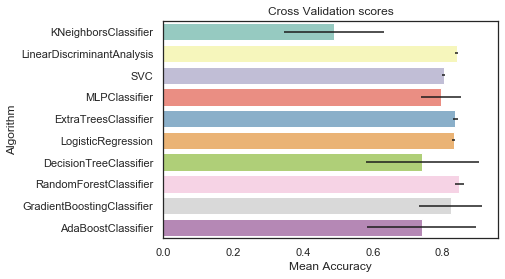

In [18]:
# CREATING A DATA FRAME OF THE CROSS VALIDATION RESULTS

cv_df = pd.DataFrame(cross_val_data)
g = sns.barplot("Cross_Val_Mean", "Algorithm", data = cv_df, palette = "Set3", orient = "h", **{'xerr' : cv_df['Cross_Val_Std']})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross Validation scores")

In [20]:
cv_df.sort_values(by = 'Cross_Val_Mean', ascending = False)

,Algorithm,Cross_Val_Mean,Cross_Val_Std
7,RandomForestClassifier,0.847794,0.013634
1,LinearDiscriminantAnalysis,0.840545,0.004502
4,ExtraTreesClassifier,0.836615,0.006338
5,LogisticRegression,0.831639,0.004728
8,GradientBoostingClassifier,0.822493,0.089997
2,SVC,0.802586,0.005326
3,MLPClassifier,0.794262,0.057176
6,DecisionTreeClassifier,0.741660,0.160900
9,AdaBoostClassifier,0.739633,0.157169
0,KNeighborsClassifier,0.489335,0.143332


## EVALUATION

### *  Gradient Boosting Classifier

In [22]:
GBC = GradientBoostingClassifier

In [24]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier